### Importing the libraries

In [64]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/zensei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
INPUT_FILE = 'training_dataset.csv'
INFORMATION_COLUMN = 'Information'
CATEGORY_COLUMN = 'Tag'
LABEL_COLUMN = 'Label'

### Import Dataset

In [66]:
dataset = pd.read_csv(INPUT_FILE)

print(dataset.info())
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Information  313 non-null    object
 1   Tag          313 non-null    object
dtypes: object(2)
memory usage: 5.0+ KB
None
                             Information    Tag
0                  Let's go to the beach  tower
1                   I want something hot    hot
2  The kids want to go out for ice cream    hot
3                         Is cold as ice    ice
4  The kids want to go out for ice cream  lolly


# Preprocessing

In [67]:
classes = dataset['Tag'].unique()
print(classes)

['tower' 'hot' 'ice' 'lolly' 'sweet']


### Label encoding

In [68]:
# Label encoding and create a new column with the encoded data
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(dataset[CATEGORY_COLUMN])

# create new column with the encoded values
dataset[LABEL_COLUMN] = label_encoder.transform(dataset[CATEGORY_COLUMN])

# create new column with the encoded values
dataset[LABEL_COLUMN] = label_encoder.transform(dataset[CATEGORY_COLUMN])

In [69]:
dataset.head()

,Information,Tag,Label
0,Let's go to the beach,tower,4
1,I want something hot,hot,0
2,The kids want to go out for ice cream,hot,0
3,Is cold as ice,ice,1
4,The kids want to go out for ice cream,lolly,2


In [70]:
# Shuffle the rows randomly
dataset = dataset.sample(frac=1, random_state=42)  # Setting random_state for reproducibility

# Reset the index of the shuffled DataFrame
dataset = dataset.reset_index(drop=True)

### Creating the feature and dependent variables

In [71]:
X = dataset[INFORMATION_COLUMN]
y = dataset[LABEL_COLUMN]

In [72]:
# Checking the X and y values ...
print(X)
print('\n')
print(y)

0                             Pancakes with syrup
1                      Let's go for some swimming
2        Drizzling maple syrup on my French toast
3                     Doing backflips in the pool
4                       Chili peppers make it hot
                          ...                    
308    Munching on chocolate-covered strawberries
309                            Wanting some curry
310           Delighting in a slice of cheesecake
311             Making a splash in the hotel pool
312               The kids are hankering for stew
Name: Information, Length: 313, dtype: object


0      3
1      4
2      3
3      4
4      0
      ..
308    3
309    0
310    3
311    4
312    0
Name: Label, Length: 313, dtype: int64


### Creating the Bag of Words model

In [73]:
all_stopwords = stopwords.words('english')
all_stopwords.append('like')

vectorizer = TfidfVectorizer(stop_words=all_stopwords, max_features=1000)
vectorized_X = vectorizer.fit_transform(X)
vectorized_X

<313x345 sparse matrix of type '<class 'numpy.float64'>'
	with 1065 stored elements in Compressed Sparse Row format>

### Split training and test sets

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectorized_X, y, test_size = 0.20, random_state = 0)

In [75]:
print(X_train.shape)
print(X_train)
print()
print(y_train)

(250, 345)
  (0, 3)	0.6372210308860734
  (0, 70)	0.4557297041727084
  (0, 58)	0.39370268301826994
  (0, 266)	0.48089291106790205
  (1, 132)	0.6383167372530373
  (1, 41)	0.52252510095759
  (1, 13)	0.5652603486995149
  (2, 343)	0.5018651562680451
  (2, 78)	0.5018651562680451
  (2, 129)	0.4840632814883139
  (2, 123)	0.40133312781376296
  (2, 175)	0.31761169670226036
  (3, 38)	0.6013465718910483
  (3, 224)	0.5610864733714416
  (3, 166)	0.3200265616662994
  (3, 73)	0.3358206710698489
  (3, 148)	0.3291986430481227
  (4, 101)	0.5735552496949826
  (4, 67)	0.43111197467025286
  (4, 267)	0.4695114466861029
  (4, 175)	0.3080637034575531
  (4, 308)	0.41210750646643285
  (5, 168)	0.5479697269307232
  (5, 127)	0.5112832033464665
  (5, 50)	0.41188065345449126
  :	:
  (242, 224)	0.5853686628379474
  (242, 44)	0.5135650201249261
  (243, 49)	0.5428961543466386
  (243, 242)	0.6130621097111195
  (243, 216)	0.40909735393022284
  (243, 100)	0.4025642436176767
  (244, 144)	0.5587273713594495
  (244, 105)	0.5

### Training the model

In [76]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

### Prediction and classification

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  1  0  2  0]
 [ 0  9  0  0  0]
 [ 2  0  4  0  0]
 [ 0  0  0 17  0]
 [ 0  0  0  2 12]]


0.8888888888888888

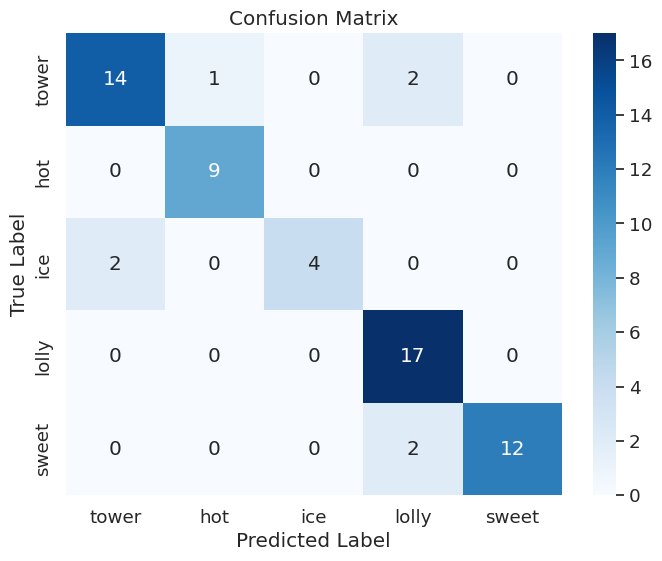

In [78]:
plt.figure(figsize=(8, 6))
# Adjust font size as needed
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# plt.savefig("confusion.png")

### Plot Confusion Matrix

### Single prediction

In [79]:
X_test.shape

(63, 345)

In [83]:
# Wrap the single value in a list
value = ['Going to the beach']
# value = ['I want to eat something cold']
# value = ['Chilling by the fireplace']
# value = ['I like this cake']

# Transform the single value using the same vectorizer used for training
vectorized_value = vectorizer.transform(value)

y_pred = classifier.predict(vectorized_value)
category = label_encoder.inverse_transform(y_pred)
print(f"The category is: {category}")

The category is: ['tower']
